### Min cost climbing stairs

* 대상이 계단을 올라가는데, 한 번 올라갈 때마다 1 step or 2 step씩 올라갈 수 있다. 문제에서 정수형 배열 cost가 주어지는데, cost[i]는 i번째 계단을 밟았을 때 지불해야 하는 비용이다.
* 처음 시작은 index = 0 또는 index = 1 중 한 곳에서 시작할 수 있다.
* 이 계단의 꼭대기에 도착하기 위해 지불해야 하는 비용의 최솟값을 반환하라.

> 제약조건
* $ 2<= cost.length <= 1000
* $ 0 <= cost.[i] <= 999

In [2]:
cost = [10, 15, 20]
output = 15
cost = [1,100,1,1,1,100,1,1,100,1]
output = 6
# 문제에서 제공
# class Solution:
#     def minCostClimbingStairs(self, cost: list[int]) -> int:

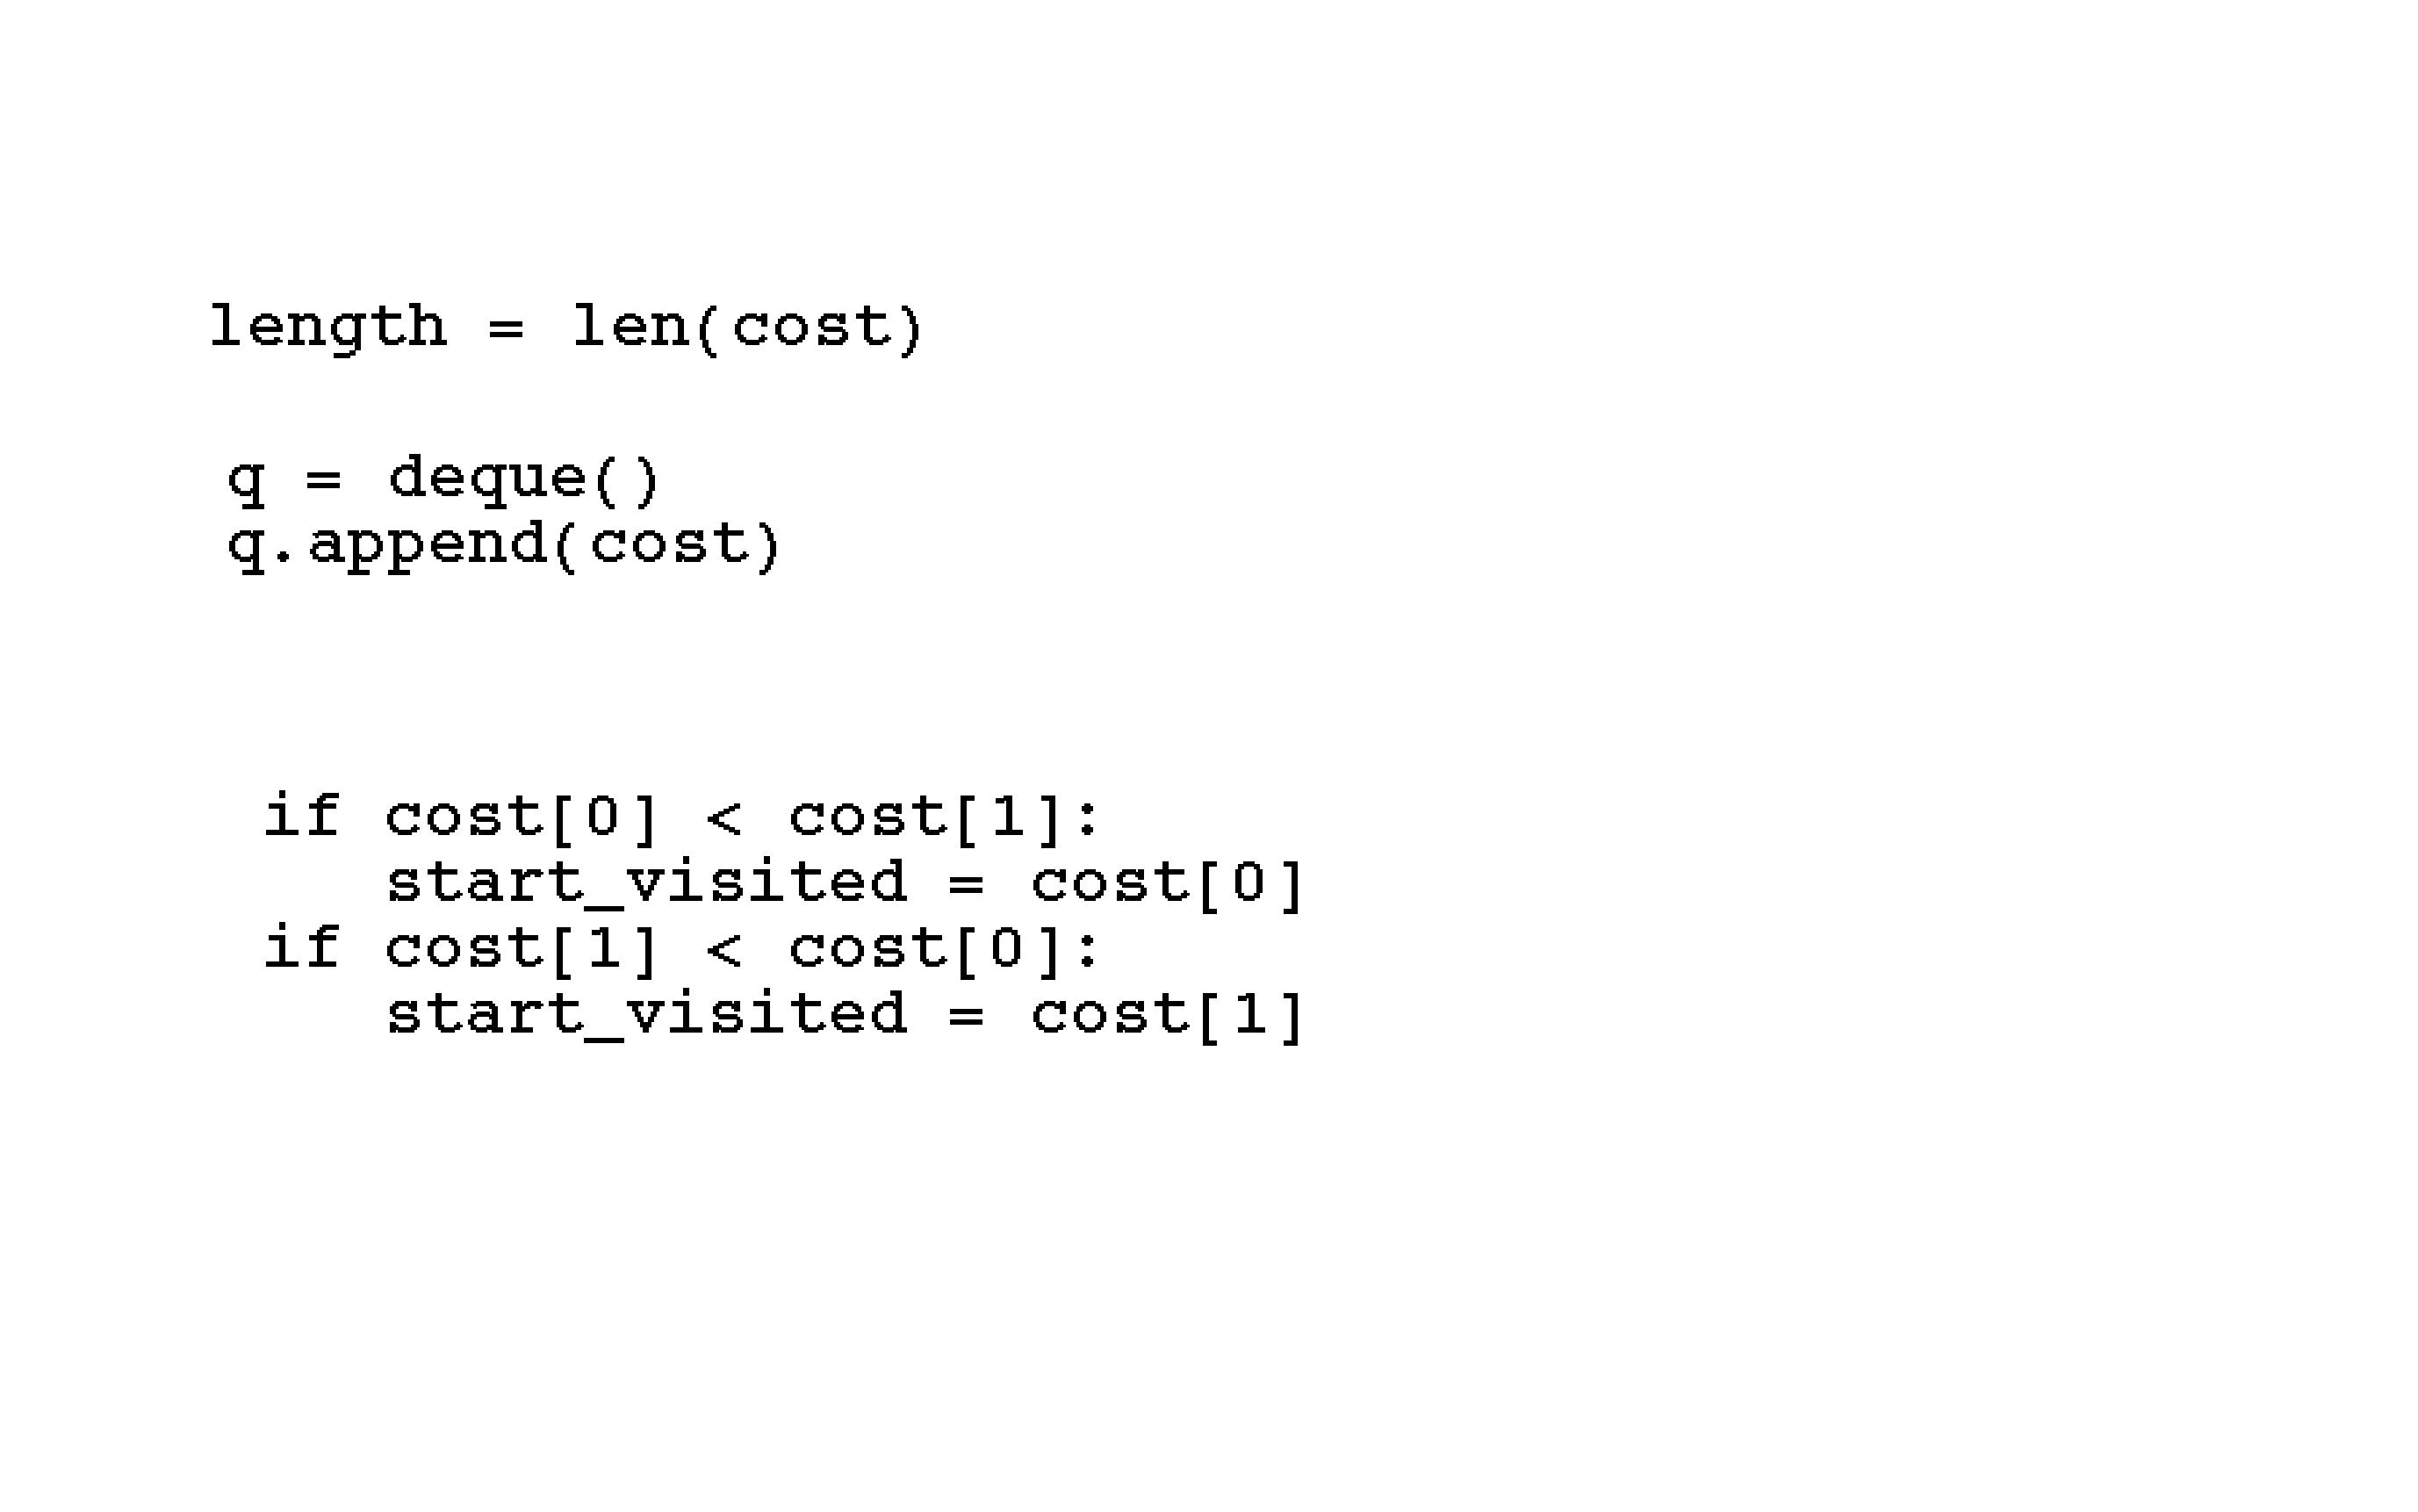

In [53]:
# O(n^2)도 가능
# 문제에서 기본 제공

# 내 풀이
from collections import deque
class Solution:
    def minCostClimbingStairs(self, cost: list[int]) -> int:
        length = len(cost)
        current_visited = 0
        q = deque()
        len_list = []
        len_list2 = []
        for v in range(length):
            if v % 2 ==1:
                len_list.append(v) # 짝수 리스트(0포함)
            else:
                len_list2.append(v)# 홀수 리스트
        for i in cost:
            q.append(i)
        while q:
            current_visited = q.popleft()
            sumlist = []
            for i in len_list:
                for j in len_list2:
                    if i == len(cost) or j == len(cost):
                        break
                    if cost[j] < cost[i]:
                        pass
                    if cost[i] < cost[j]:
                        current_visited = q.popleft()
                    sumlist.append(current_visited)
                    # 어떻게 건너띄어야 하지요?
            return sum(sumlist)

In [54]:
S = Solution
cost = [10, 15, 20]
S.minCostClimbingStairs(S, cost)

25

In [55]:
# 해결방안
# 시간복잡도는 일단 n^2이 걸리는데, 상당히 힘들것으로 예상됨

# 접근방법

### (1)완전탐색

* 모든 경우의 수를 전부 따져봅니다.
- 재귀문 이용

In [56]:
class Solution:
    def minCostClimbingStairs(self, cost: list[int]) -> int:

        def DFS(n):
            if n ==1 and n == 0:
                return 0
            return min(DFS(n-1)+cost[n-1], DFS(n-2)+cost[n-2])

# 시간초과로 실패
# 중복계산이 가능하다

### 시간복잡도 : $O(2^n)$

#### DP - Top-down 방식

In [45]:
# 해결안 top down
memo = {}
class Solution:
    def minCostClimbingStairs(self, cost: list[int]) -> int:
        n = len(cost) 
        cost.append(0)
        memo = {0: cost[0], 1: cost[1]}
        for i in range(2,n+1):
            memo[i] = min(memo[i-1], memo[i-2])+cost[i]
        return memo[n]

In [46]:
S = Solution
cost = [10, 15, 20, 17, 1]
S.minCostClimbingStairs(S, cost)

31

In [36]:
# 또다른 풀이
memo = {}
class Solution:
    def minCostClimbingStairs(self, cost: list[int]) -> int:
        n = len(cost)
        cost.append(0)
        memo = {1:0, 2:0}
        def dp(n):
            if n==0 and n ==1:
                return 0
            if n not in memo:
                memo[n] = min(dp(n-1) + cost[n-1], dp(n-2)+cost[n-2])
            return memo[n]
        
        return dp(n)

### 시간복잡도 : $O(n)$

In [ ]:
# 기본제공
class Solution:
    def minCostClimbingStairs(self, cost: list[int]) -> int:

In [26]:
# bottom-up 방식
# 문제에서 기본 제공
class Solution:
    def minCostClimbingStairs(self, cost: list[int]) -> int:
        n = len(cost)
        # memo는 넉넉하게 넣어야 마지막 계단 이후 top까지 계산이 가능
        memo = [0]*(n+1)
        # base case로 초기 값
        memo[0] = 0
        memo[1] = 0
        for i in range(2, n+1):
            memo[i] = min(memo[i-1]+cost[i-1], memo[i-2]+cost[i-2])
        return memo[n]

In [68]:
# list memoization + bottom up
class Solution:
    def minCostClimbingStairs(self, cost: list[int]) -> int:
        n = len(cost)
        memo = [0]*(n+1)
        # base case로 초기 값
        memo[0] = 0
        memo[1] = 0
        for i in range(2, n+1):
            memo[i] = min(memo[i-1]+cost[i-1], memo[i-2]+cost[i-2])
        return memo[n]


In [69]:
S = Solution
cost = [10, 15, 20, 17, 1,1,1]
S.minCostClimbingStairs(S, cost)

32

In [28]:
class Solution:
    def minCostClimbingStairs(self, cost: list[int]) -> int:
        n = len(cost)
        memo = [0]*(n+1)
        memo[0] = 0
        memo[1]= 0
        for i in range(2, n+1):
            memo[i] = min(memo[i-1]+cost[i-1], memo[i-2]+cost[i-2])
        return memo[n]

In [44]:
S = Solution
cost = [10, 15, 20, 17, 1]
S.minCostClimbingStairs(S, cost)

31

In [43]:
#top down + dict memoization
memo = {}
class Solution:
    def minCostClimbingStairs(self, cost: list[int]) -> int:
        n = len(cost)
        cost.append(0)
        memo = {0:cost[0], 1:cost[1]}
        for i in range(2, n+1):
            memo[i] = min(memo[i-1], memo[i-2])+cost[i]
        return memo[n]


In [57]:
# bottom-up
class Solution:
    def minCostClimbingStairs(self, cost: list[int]) -> int:
        n = len(cost)
        cost.append(0)
        memo = [0]*(n+1)
        for n in range(2, n+1):
            memo[n] = min(memo[n-1]+cost[n-1], memo[n-2]+cost[n-2])
        return memo[n]

In [58]:
S = Solution
cost = [10, 15, 20]
S.minCostClimbingStairs(S, cost)

15

In [56]:
# top-down
memo = {}
class Solution:
    def minCostClimbingStairs(self, cost):
        memo = {0:cost[0], 1:cost[1]}
        n = len(cost)
        cost.append(0)
        for n in range(2, n+1):
            memo[n] = min(memo[n-1]+min[n-2])+cost[n]
        return memo[n]


In [62]:
cost = [10, 15, 20]
output = 15
# 문제에서 제공
# bottom up
class Solution:
    def minCostClimbingStairs(self, cost: list[int]) -> int:
        n = len(cost)
        cost.append(0)
        memo = [-1]*(n+1)
        for i in range(2, n+1):
            memo[i] = min(memo[i-1]+cost[i-1], memo[i-2]+cost[i-2])
        return memo[n]


In [12]:
class Solution:
    def minCostClimbingStairs(self, cost: list[int]) -> int:
        memo = {}
        def dp(n):
            if n == 0 and n == 1:
                return 0
            if n not in memo:
                memo[n] = min(dp(n-1)+cost[n-1], dp(n-2)+cost[n-2])
            return memo[n]
        


In [11]:
array = [1,2]
if len(array) == 2:
    min_cost = min(array)
min_cost

1

In [ ]:
# bottom-up
class Solution:
    def minCostClimbingStairs(self, cost: List[int]) -> int:
        n = len(cost)
        memo = []
        memo = [0]*(n+1)
        for i in range(2, n+1):
            memo[i] = min(memo[i-1]+cost[i-1], memo[i-2]+cost[i-2])
        return memo[n]

In [ ]:
# top-down
class Solution:
    def minCostClimbingStairs(self, cost: List[int]) -> int:
        n = len(cost)
        memo = {}
        memo = {0:cost[0], 1:cost[1]}
        cost.append(0)
        if n == 1 and n == 2:
            return 0
        for i in range(2, n+1):
            memo[i] = min(memo[i-2],memo[i-1])+cost[i]
        return memo[n]
        